### Module Import

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### Dataset definition

In [2]:
df = pd.read_csv('stroke_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


### Fields descriptions

- Gender: The person's gender, indicating whether they are male or female.

- Age: The person's age, indicating how many years old they are. This variable includes floats.

- Hypertension: Indicates whether the person has hypertension or high blood pressure (1 if they have it, 0 if they don't).

- Heart disease: Indicates whether the person has heart disease (1 if they have it, 0 if they don't).

- Ever_married: Indicates whether the person has ever been married (yes or no).

- Work_type: The type of work the person does, which can be categorized in various ways, such as office work, manual labor, etc.

- Residence_type: The type of residence of the person, which can be "Rural" or "Urban," indicating whether they live in a rural or urban area.

- Avg_glucose_level: The person's average blood glucose level, which is an important measure for assessing a person's health, especially in relation to diabetes. This variable has a float data type.

- bmi: The person's Body Mass Index (BMI), which is a measure that relates a person's weight and height to assess their body composition and potential obesity. It is a float.

- Smoking_status: The person's smoking status, which can be categorized into different states such as "never smoked," "former smoker," or "current smoker and "Unknown".

### Categorical Variables

In [4]:
cat = df.select_dtypes(include = ['object'])
cat_columns = list(cat)

In [5]:
for col in cat_columns:
    print(f'Column name: {col}')
    print(df[col].value_counts())
    print()

Column name: gender
Female    2907
Male      2074
Name: gender, dtype: int64

Column name: ever_married
Yes    3280
No     1701
Name: ever_married, dtype: int64

Column name: work_type
Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

Column name: Residence_type
Urban    2532
Rural    2449
Name: Residence_type, dtype: int64

Column name: smoking_status
never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64



### Numeric Variables

In [6]:
num = df.select_dtypes(include = ['number'])
num_columns = list(num)
print(num_columns)

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


In [7]:
for col in num_columns:
    print(f'Column name: {col}')
    print(df[col].value_counts())
    print()

Column name: age
78.00    102
57.00     92
54.00     85
51.00     84
79.00     84
        ... 
0.48       3
1.16       3
0.40       2
0.08       2
0.16       1
Name: age, Length: 104, dtype: int64

Column name: hypertension
0    4502
1     479
Name: hypertension, dtype: int64

Column name: heart_disease
0    4706
1     275
Name: heart_disease, dtype: int64

Column name: avg_glucose_level
93.88     6
83.16     5
73.00     5
72.49     5
91.68     5
         ..
120.09    1
197.58    1
99.91     1
133.76    1
60.50     1
Name: avg_glucose_level, Length: 3895, dtype: int64

Column name: bmi
28.7    42
28.4    41
27.3    38
26.1    37
27.7    37
        ..
46.6     1
47.9     1
46.3     1
48.0     1
14.9     1
Name: bmi, Length: 342, dtype: int64

Column name: stroke
0    4733
1     248
Name: stroke, dtype: int64



In [8]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


### Null Values Verification

In [9]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Duplicate Check

In [10]:
df.duplicated().sum()

0

### Cardinality Verification

In [11]:
df.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

- There are no duplicates and nulls in the dataset.

- We found few columns with unbalanced categories: heart_disease, hypertension, stroke.

- We found multiple variables with numeric datatype, but they are truly boolean. We could change the datatype in the future and see how the model responds.

- avg_glucose_level has a high cardinality. We could try in the future to group this variable in different categories.

### Outliers Exploration

In [12]:
num_outliers = df[['age', 'avg_glucose_level', 'bmi','stroke']]
num_columns = list(num_outliers)

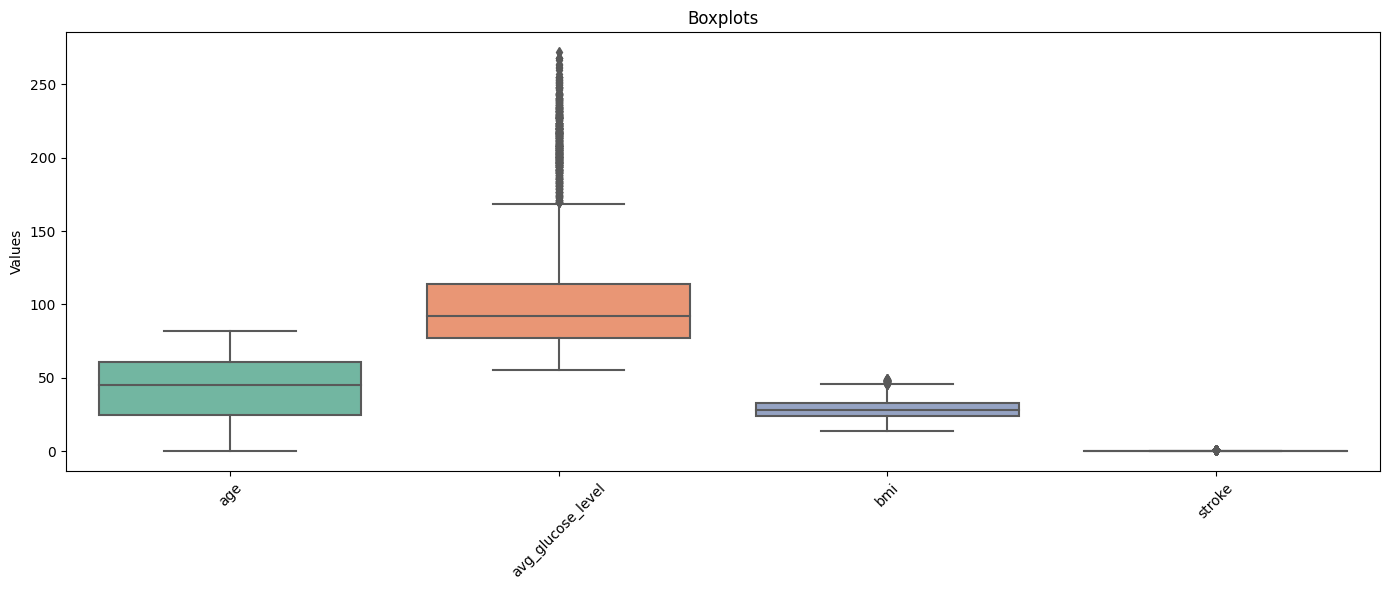

In [13]:
plt.figure(figsize=(14, 6))

sns.boxplot(data=num_outliers, orient="v", palette="Set2")

plt.xticks(rotation=45)
plt.ylabel("Values")
plt.title("Boxplots")

plt.tight_layout()
plt.show()

- avg_glucose_level has a outliers which can be treated like separate groups. We can investigate separately.

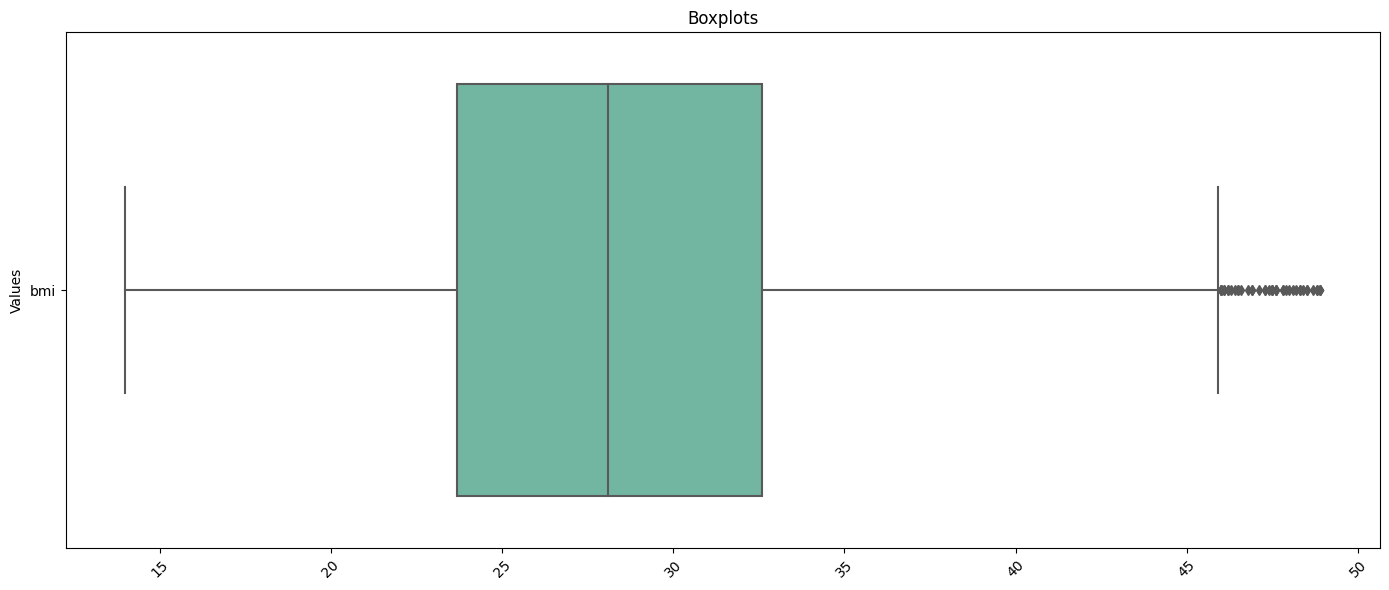

In [14]:
bmi = df[['bmi']]

plt.figure(figsize=(14, 6))

sns.boxplot(data=bmi, orient="h", palette="Set2")

plt.xticks(rotation=45)
plt.ylabel("Values")
plt.title("Boxplots")

plt.tight_layout()
plt.show()

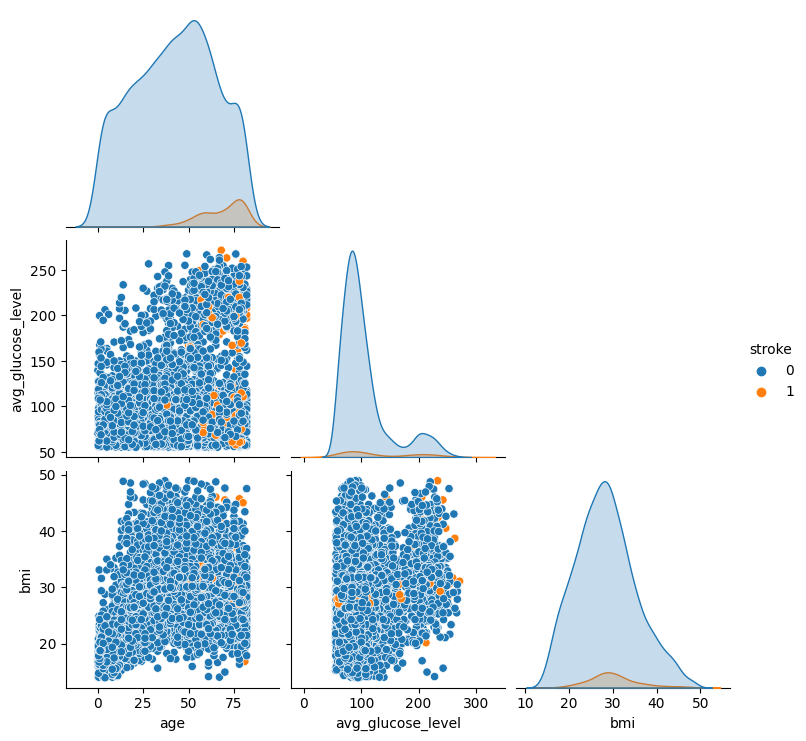

In [15]:
sns.pairplot(data=df[num_columns], hue = "stroke", corner= True)

- Age graph shows high concentration of the strokes on the right side (50+ y.o.).

- Going to continue with detailed analysis of each variable.

- AVG_glucose level  has 2 picks in the graphs which can be investigated like 2 different groups with levels(1 - 160 and 160 -300).  

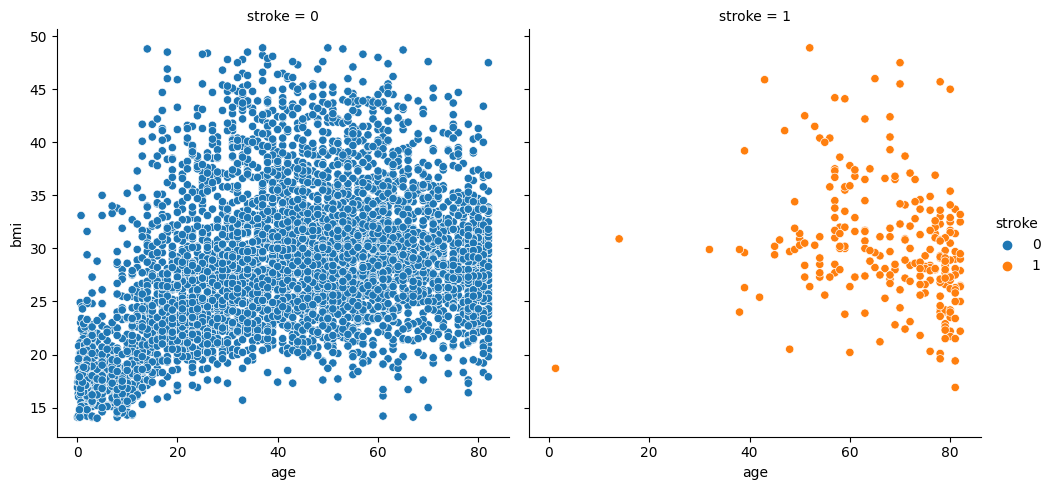

In [16]:
sns.relplot(data= df, x="age", y ='bmi', hue = 'stroke', col ='stroke')

- Based on the graph above we can state that many persons suffer from obesity in the age 50+ and had strokes and we can consider it has some correlation. (to be confirmed by heatmap)

Bajo peso: IMC menor a 18.5

Peso normal: IMC entre 18.5 y 24.9
Sobrepeso: IMC entre 25 y 29.9
Obesidad leve: IMC entre 30 y 34.9
Obesidad moderada: IMC entre 35 y 39.9
Obesidad grave: IMC de 40 o superior

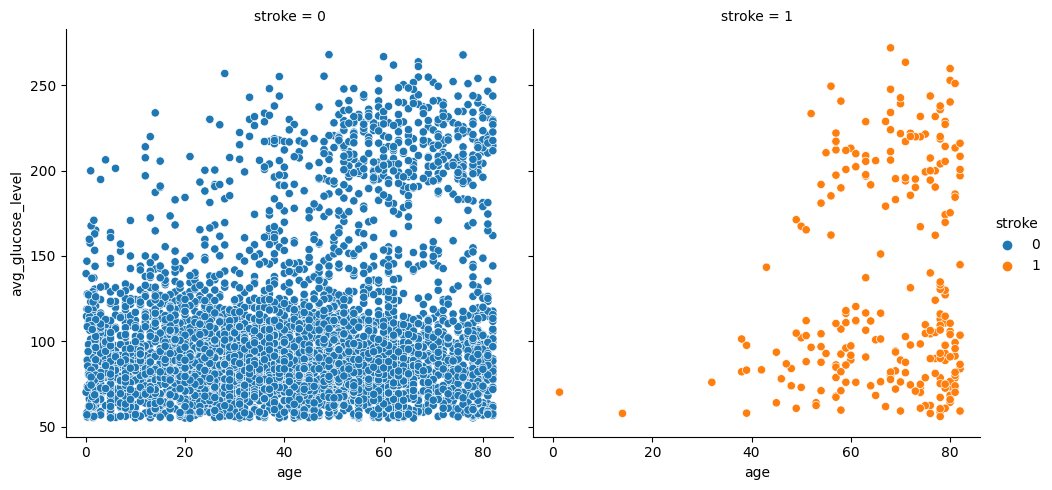

In [17]:
sns.relplot(data= df, x="age", y ='avg_glucose_level', hue = 'stroke', col ='stroke')

- The normal values of glucose level is between 70-126 mg/dl, 140-199 it's sign of diabetes start  and the value over 200 means it's critical diabetes stage.  On the graph we can see points grouped on 2 sides - normal and critical level and few data in prediabetes stage.  

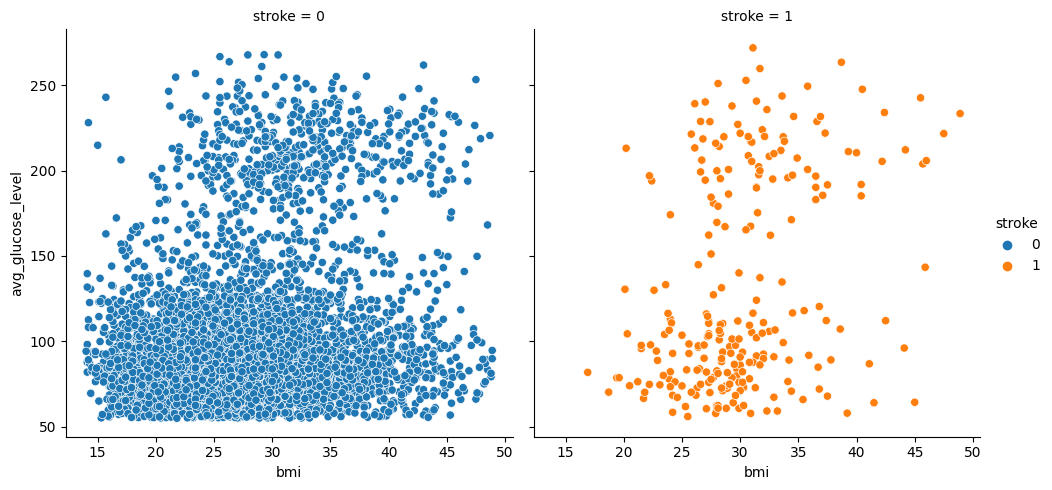

In [18]:
sns.relplot(data= df, x="bmi", y ='avg_glucose_level', hue = 'stroke', col ='stroke')

- From the view we can take 2 groups: 1 - normal level of glucose and high bmi(overweight), 2  - high level of glucose(diabetes) and high bmi (overweight). The idea is to create additional groups(columns) in dataset to analyse  the impact by groups.

smoking_status  Unknown  formerly smoked  never smoked  smokes
gender                                                        
Female              808              464          1194     441
Male                692              403           644     335


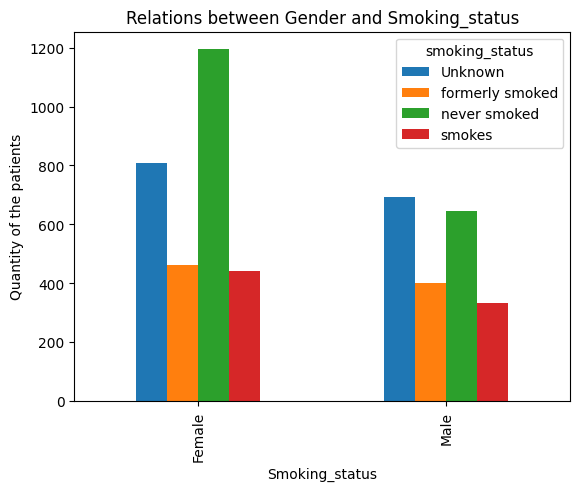

In [19]:
contingency_table = pd.crosstab(df['gender'], df['smoking_status'])

print(contingency_table)

contingency_table.plot(kind='bar', stacked=False)
plt.title('Relations between Gender and Smoking_status')
plt.xlabel('Smoking_status')
plt.ylabel('Quantity of the patients')
plt.show()

- There is high number of Unknown values in Smoking status column so we have different approaches of how to deal with it. Impute all children under 12yo field with "never smoked" status and for all the rest use KNN impute mode or leave it as "Unknown" class.

- According to the graph, there are more females that never smoked than male in this same category.

stroke                     0   1
gender smoking_status           
Female Unknown           783  25
       formerly smoked   430  34
       never smoked     1132  62
       smokes            422  19
Male   Unknown           670  22
       formerly smoked   367  36
       never smoked      617  27
       smokes            312  23


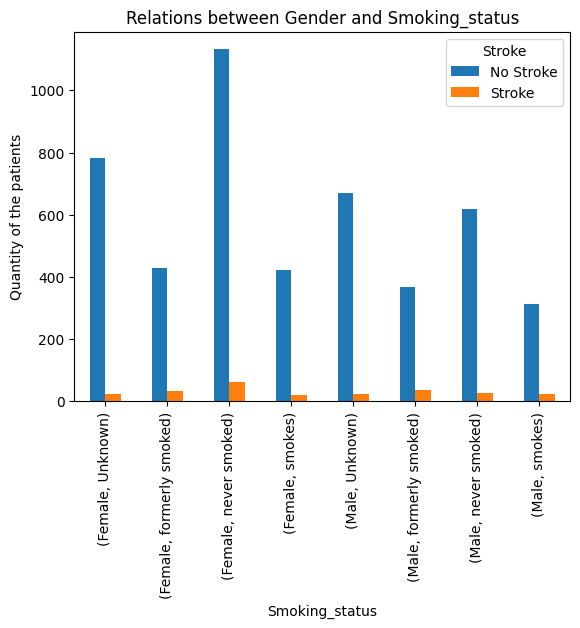

In [20]:
contingency_table = pd.crosstab([df['gender'], df['smoking_status']], df['stroke'])

print(contingency_table)

contingency_table.plot(kind='bar', stacked=False)
plt.title('Relations between Gender and Smoking_status')
plt.xlabel('Smoking_status')
plt.ylabel('Quantity of the patients')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()

### Heatmap: Correlation between Numerical Variables

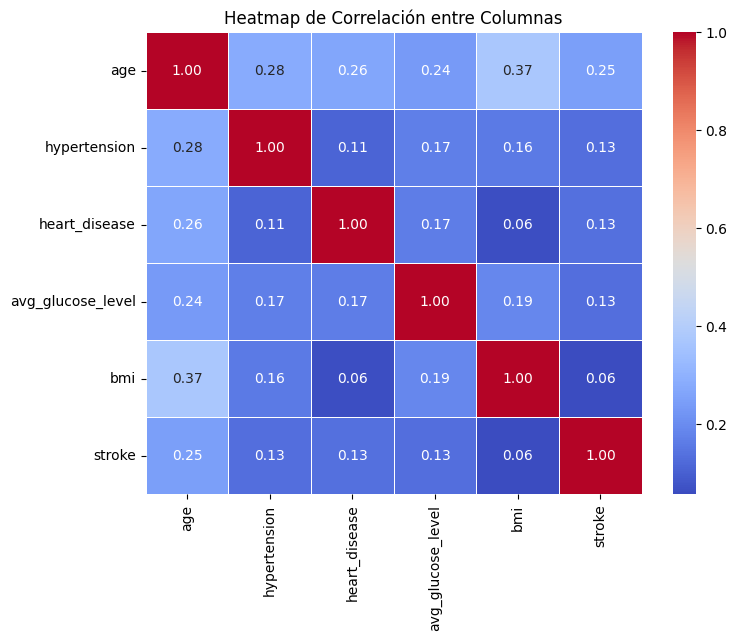

In [21]:
# Mapa de calor

correlacion_numericas = df.corr()

# Crear el heatmap
plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura, puede ponerse o no.
sns.heatmap(correlacion_numericas, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de Correlación entre Columnas')
plt.show()

We did not observe any significant correlation.

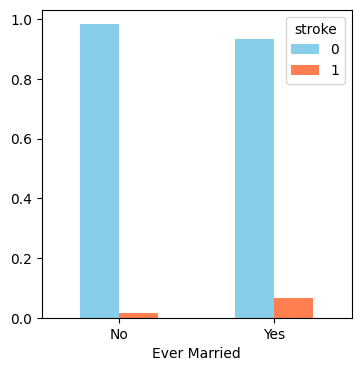

In [22]:
#Ever married-stroke
Ever_married=pd.crosstab(df['ever_married'],df['stroke'])
Ever_married.div(Ever_married.sum(1).astype(float), axis=0).plot.bar(stacked=False, figsize=(4,4),color = ['skyblue','coral'])
plt.xticks(rotation = 360)
plt.xlabel('Ever Married');

We observed a higher number of strokes among married people.

### Transforming categorical variables into numerical (Heatmap)

Making copy of dataset.

In [23]:
df_onehot=df.copy()

We apply one hot encoder to categorical columns dropping the first column if binary 

In [24]:
cat = df.select_dtypes(include = ['object'])
cat_columns = list(cat)

print(cat_columns)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [25]:
onehot = OneHotEncoder(drop = 'if_binary', handle_unknown='ignore', sparse=False)


In [26]:
X = onehot.fit_transform(cat)

column_names = onehot.get_feature_names_out()

df_encoded = pd.DataFrame(data = X, columns = column_names)

print(df_encoded)

      gender_Male  ever_married_Yes  work_type_Govt_job  work_type_Private  \
0             1.0               1.0                 0.0                1.0   
1             1.0               1.0                 0.0                1.0   
2             0.0               1.0                 0.0                1.0   
3             0.0               1.0                 0.0                0.0   
4             1.0               1.0                 0.0                1.0   
...           ...               ...                 ...                ...   
4976          1.0               0.0                 0.0                1.0   
4977          1.0               1.0                 0.0                1.0   
4978          0.0               1.0                 1.0                0.0   
4979          1.0               1.0                 0.0                1.0   
4980          0.0               1.0                 0.0                1.0   

      work_type_Self-employed  work_type_children  Residence_ty

In [27]:
concatenated_df = pd.concat([num, df_encoded], axis=1)
concatenated_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,80.0,0,1,105.92,32.5,1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,49.0,0,0,171.23,34.4,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,79.0,1,0,174.12,24.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,81.0,0,0,186.21,29.0,1,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [28]:
concatenated_df.shape

(4981, 17)

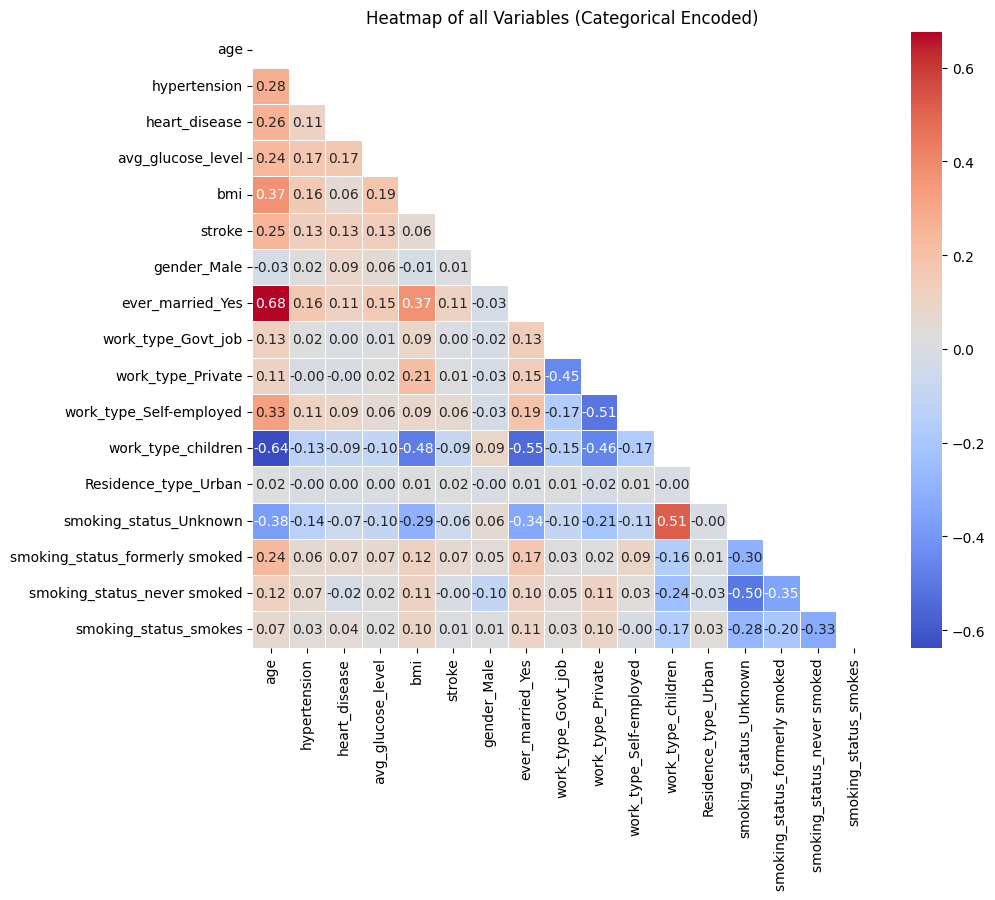

In [29]:
# Mapa de calor
all_correlation = concatenated_df.corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(all_correlation, dtype = bool))
sns.heatmap(all_correlation, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, mask = mask)
plt.title('Heatmap of all Variables (Categorical Encoded)')
plt.show()

- Moderate correlation between age and work_type_children (-0.64)

- Moderate correlation between age and ever_married_Yes (0.68)

- Moderate correlation between ever_married_Yes and work_type_children (-0.55)

- Moderate correlation between work_type_Private and work_type_Self-employed (-0.51)

- Moderate correlation between work_type_children and smoking_status_Unknown (0.51)

- Moderate correlation between smoking_status_Unknown and smoking_status_never smoked (-0.50)

Maybe there is multi-collinearity between some variables that have more than 0.6 as the correlation coefficient. We could try to eliminate one variable or combine them in one to improve model's performance.

### ML model test

In [44]:
model = RandomForestClassifier()

In [45]:
X, y = concatenated_df.drop('stroke',axis = 1),concatenated_df['stroke'] 

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
model.fit(X_train,y_train)
y_pred = model.predict(X_train)

#Define a prediction function for the given model
accuracy = round(accuracy_score(y_train, y_pred), 3)
precision = round(precision_score(y_train, y_pred), 3)
recall = round(recall_score(y_train, y_pred), 3)

print('Model: {} || Accuracy: {} || Precision: {} || Recall: {}'.format(model,accuracy, precision, recall))

Model: RandomForestClassifier() || Accuracy: 1.0 || Precision: 1.0 || Recall: 0.995


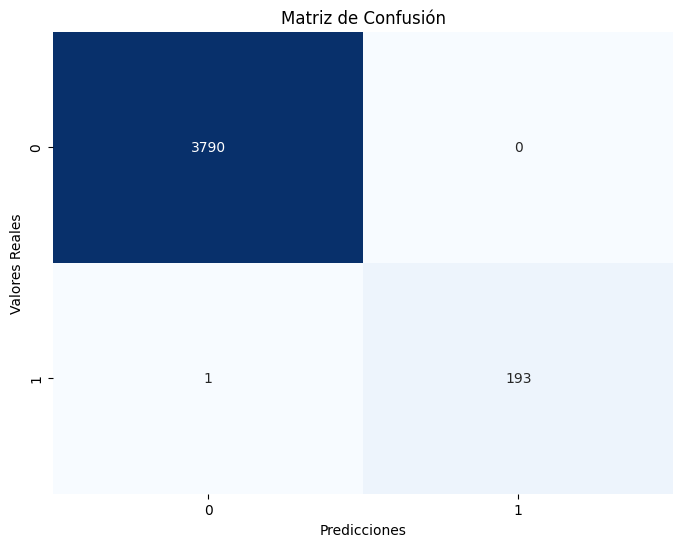

In [48]:
conf_matrix = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

In [49]:
y_pred = model.predict(X_test)

#Define a prediction function for the given model
accuracy = round(accuracy_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred), 3)
recall = round(recall_score(y_test, y_pred), 3)

print('Model: {} || Accuracy: {} || Precision: {} || Recall: {}'.format(model,accuracy, precision, recall))

Model: RandomForestClassifier() || Accuracy: 0.941 || Precision: 0.0 || Recall: 0.0


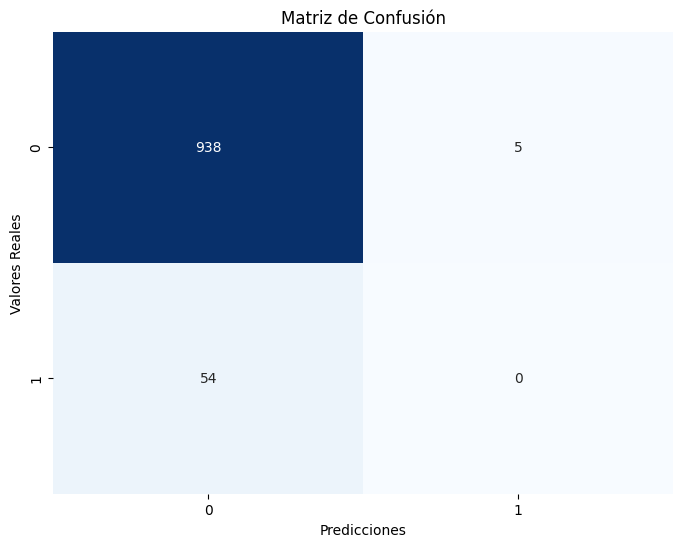

In [51]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

With this preliminary test of a Random Forest Model, we see that there is overfitting. It is probably due to the unbalanced categories. There is few data in the stroke category.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=af12788f-aecc-4989-a302-f8b336f386d1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>